# Ćwiczenia 1
W trakcie ćwiczeń implementowana będzie metoda przeszukiwania - Metoda gradientu prostego.
Celem ćwiczeń jest implementacja metody gradientu prostego dla dwóch funkcji oraz przebadanie wpływu rozmiaru kroku dla różnych (losowych) punktów początkowych. Należy zwizualizować proces minimalizacji na wykresie 2D.

## Punktacja:
 - obliczenie gradientów funkcji 1 pkt
 - implementacja kroku gradientu prostego 1 pkt
 - przeprowadzenie przeszukiwania minimum na obu funkcjach 1 pkt
 - wizualizacja przeszukiwania z wielu miejsc początkowych 1 pkt


In [23]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

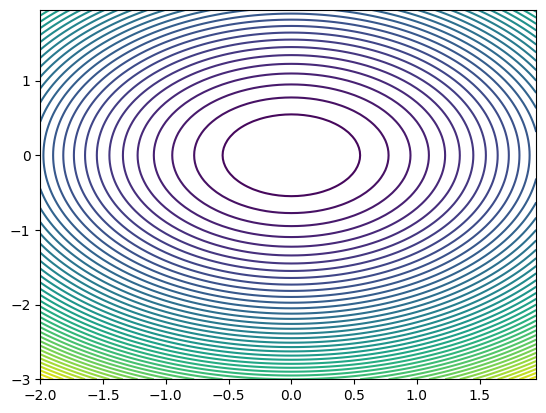

In [24]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

# Contour plot en 2D
plt.figure()
plt.contour(X, Y, Z, 50)
plt.show()

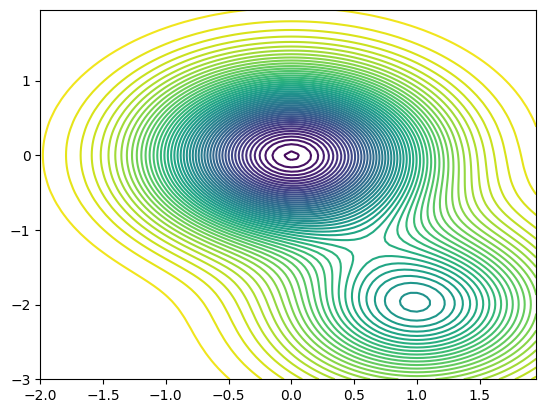

In [25]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)
plt.show()

Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

# Obliczanie gradientów funkcji

In [26]:
def f_func(x: float, y: float) -> float:
    return x**2 + y**2


def g_func(x: float, y: float) -> float:
    return 1.5 - np.exp(-x**2 - y**2) - 0.5 * np.exp(-(x - 1)**2 - (y + 2)**2)


def gradient(func: Callable[[float, float], float],
             x: float, y: float, h: float = 1e-6) -> Tuple[float, float]:
    df_dx = (func(x + h, y) - func(x - h, y)) / (2 * h)
    df_dy = (func(x, y + h) - func(x, y - h)) / (2 * h)
    return df_dx, df_dy


# Test obliczania gradientów funkcji

In [27]:
expected_gradient_of_f_func = (2, 4)
expected_gradient_of_g_func = (0.02699718792, 0.01361209378)

print("Gradient of f_func at the point of (1, 2) should be "
      f"{expected_gradient_of_f_func}. It is {gradient(f_func, 1, 2)}\n")
print("Gradient of g_func at the point of (2, 1) should be "
      f"{expected_gradient_of_g_func}. It is {gradient(g_func, 2, 1)}")



Gradient of f_func at the point of (1, 2) should be (2, 4). It is (2.000000000279556, 4.000000000115023)

Gradient of g_func at the point of (2, 1) should be (0.02699718792, 0.01361209378). It is (0.026997188040667197, 0.013612093785475565)


# Metoda gradientu prostego

In [28]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[Callable[[float, float], float], float, float, float],
                                     Tuple[float, float]],
                 alpha: float = 0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = None
        self.changed_alpha_counter = 0

    def _calc_Z_value(self) -> None:
        self.Z = self.func(self.X, self.Y)

    def plot_func(self) -> None:
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if self.trace is not None and len(self.trace) > 0:
            plt.scatter(self.trace[:, 0], self.trace[:, 1], s=5, c='#ff33cc')
        plt.show()

    def calculate_func_value(self, x1: float, x2: float) -> float:
        return self.func(x1, x2)

    def calculate_func_grad(self, x1: float, x2: float) -> Tuple[float, float]:
        return self.grad_func(self.func, x1, x2)

    def gradient_descent_step(self, x1: float, x2: float) -> Tuple[float, float]:
        grad = self.calculate_func_grad(x1, x2)
        next_x1 = x1 - self.alpha * grad[0]
        next_x2 = x2 - self.alpha * grad[1]

        return next_x1, next_x2

    def minimize(self, x1_init: float, x2_init: float, steps: int, *,
                 if_verbose: bool = False, if_plot: bool = False) -> float:
        self.changed_alpha_counter = 0
        old_alpha = self.alpha

        x1, x2 = x1_init, x2_init
        initial_steps = steps
        self.trace = np.array([[x1, x2]])
        while steps > 0:
            new_x1, new_x2 = self.gradient_descent_step(x1, x2)
            if self.changed_alpha_counter == steps:
                break
            if self.calculate_func_value(new_x1, new_x2) >= self.calculate_func_value(x1, x2):
                self.alpha /= 2
                self.changed_alpha_counter += 1
                continue
            x1, x2 = new_x1, new_x2
            steps -= 1
            self.trace = np.vstack((self.trace, [x1, x2]))
        min_found_value = self.calculate_func_value(x1, x2)
        if if_verbose:
            print(f"Trace of search after {initial_steps} iterations (rounded to 4 decimal places): "
                  f"{list([list([round(value, 4) for value in point]) for point in self.trace])}")
            print(f"Min value of the function found is {min_found_value}\n")
        if if_plot:
            self.plot_func()

        self.alpha = old_alpha
        return min_found_value


# Prosty test kroku gradientu prostego

In [29]:
smpl_gradient_func = SimpleGradientDescent(f_func, gradient)
print(f"Next point at {smpl_gradient_func.gradient_descent_step(2, 4)}, expected: (1.6, 3.2)")

Next point at (1.6000000001217245, 3.2000000000658133), expected: (1.6, 3.2)


# Funkcja f(x) - przeszukiwanie minimum


Trace of search after 24 iterations (rounded to 4 decimal places): [[1.5, 1.5], [1.2, 1.2], [0.96, 0.96], [0.768, 0.768], [0.6144, 0.6144], [0.4915, 0.4915], [0.3932, 0.3932], [0.3146, 0.3146], [0.2517, 0.2517], [0.2013, 0.2013], [0.1611, 0.1611], [0.1288, 0.1288], [0.1031, 0.1031], [0.0825, 0.0825], [0.066, 0.066], [0.0528, 0.0528], [0.0422, 0.0422], [0.0338, 0.0338], [0.027, 0.027], [0.0216, 0.0216], [0.0173, 0.0173], [0.0138, 0.0138], [0.0111, 0.0111], [0.0089, 0.0089], [0.0071, 0.0071]]
Min value of the function found is 0.0001003533534012399



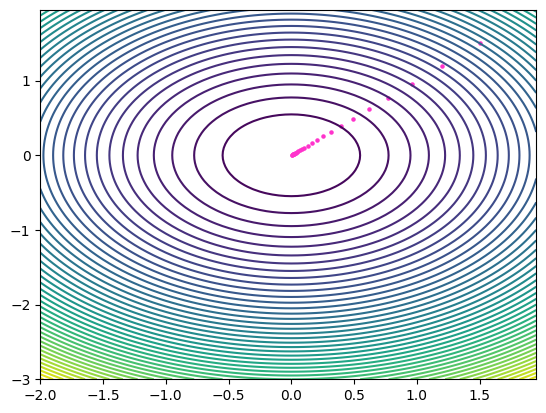

0.0001003533534012399

In [30]:
smpl_gradient_func = SimpleGradientDescent(f_func, gradient)
smpl_gradient_func.minimize(1.5, 1.5, 24, if_verbose=True, if_plot=True)

Trace of search after 26 iterations (rounded to 4 decimal places): [[1.8, -3.0], [1.44, -2.4], [1.152, -1.92], [0.9216, -1.536], [0.7373, -1.2288], [0.5898, -0.983], [0.4719, -0.7864], [0.3775, -0.6291], [0.302, -0.5033], [0.2416, -0.4027], [0.1933, -0.3221], [0.1546, -0.2577], [0.1237, -0.2062], [0.099, -0.1649], [0.0792, -0.1319], [0.0633, -0.1056], [0.0507, -0.0844], [0.0405, -0.0676], [0.0324, -0.054], [0.0259, -0.0432], [0.0208, -0.0346], [0.0166, -0.0277], [0.0133, -0.0221], [0.0106, -0.0177], [0.0085, -0.0142], [0.0068, -0.0113], [0.0054, -0.0091]]
Min value of the function found is 0.00011180487525284895



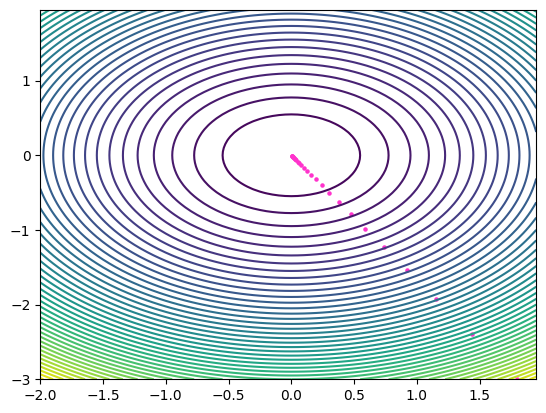

0.00011180487525284895

In [31]:
smpl_gradient_func = SimpleGradientDescent(f_func, gradient)
smpl_gradient_func.minimize(1.8, -3, 26, if_verbose=True, if_plot=True)

# Funkcja g(x) - przeszukiwanie minimum

Trace of search after 100 iterations (rounded to 4 decimal places): [[-1.5, -1.0], [-1.4882, -0.9923], [-1.4759, -0.9843], [-1.463, -0.9759], [-1.4495, -0.9671], [-1.4354, -0.9579], [-1.4206, -0.9483], [-1.405, -0.9381], [-1.3885, -0.9274], [-1.3712, -0.9161], [-1.3529, -0.9042], [-1.3334, -0.8915], [-1.3128, -0.878], [-1.2908, -0.8637], [-1.2673, -0.8484], [-1.2422, -0.832], [-1.2152, -0.8144], [-1.1862, -0.7954], [-1.155, -0.775], [-1.1211, -0.7528], [-1.0844, -0.7288], [-1.0445, -0.7027], [-1.0011, -0.6743], [-0.9539, -0.6433], [-0.9024, -0.6095], [-0.8465, -0.5728], [-0.7862, -0.5331], [-0.7215, -0.4906], [-0.6532, -0.4455], [-0.5823, -0.3987], [-0.5106, -0.3513], [-0.44, -0.3046], [-0.3729, -0.26], [-0.3112, -0.219], [-0.2564, -0.1824], [-0.209, -0.1508], [-0.169, -0.124], [-0.1357, -0.1016], [-0.1085, -0.0833], [-0.0864, -0.0684], [-0.0685, -0.0563], [-0.0541, -0.0465], [-0.0426, -0.0387], [-0.0334, -0.0324], [-0.026, -0.0273], [-0.02, -0.0233], [-0.0153, -0.02], [-0.0115, -0.017

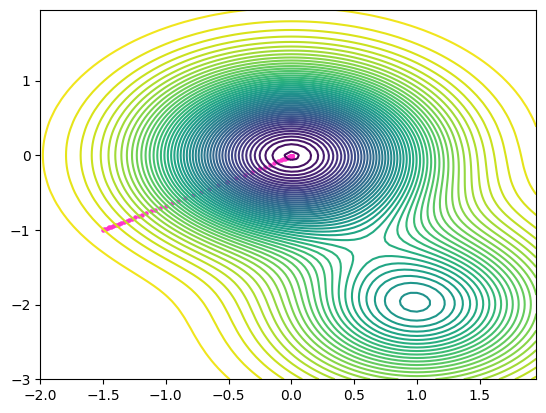

0.4965724836763585

In [32]:
smpl_gradient_func = SimpleGradientDescent(g_func, gradient)
smpl_gradient_func.minimize(-1.5, -1, 100, if_verbose=True, if_plot=True)

Trace of search after 50 iterations (rounded to 4 decimal places): [[0.7, -1.0], [0.6785, -0.9885], [0.6567, -0.9744], [0.6344, -0.9572], [0.6112, -0.9368], [0.587, -0.9127], [0.5615, -0.8846], [0.5345, -0.8521], [0.5057, -0.8148], [0.4748, -0.7727], [0.442, -0.7254], [0.4071, -0.6733], [0.3704, -0.6168], [0.3325, -0.5571], [0.2942, -0.4955], [0.2564, -0.4339], [0.2203, -0.3743], [0.1869, -0.3186], [0.1567, -0.2682], [0.1303, -0.2237], [0.1077, -0.1854], [0.0886, -0.153], [0.0728, -0.126], [0.0597, -0.1037], [0.049, -0.0854], [0.0403, -0.0705], [0.0332, -0.0583], [0.0275, -0.0485], [0.0228, -0.0405], [0.0191, -0.034], [0.016, -0.0288], [0.0136, -0.0246], [0.0116, -0.0212], [0.0101, -0.0184], [0.0088, -0.0162], [0.0077, -0.0144], [0.0069, -0.013], [0.0062, -0.0118], [0.0057, -0.0109], [0.0053, -0.0101], [0.0049, -0.0095], [0.0046, -0.009], [0.0044, -0.0086], [0.0042, -0.0083], [0.0041, -0.008], [0.004, -0.0078], [0.0039, -0.0077], [0.0038, -0.0075], [0.0037, -0.0074], [0.0037, -0.0073],

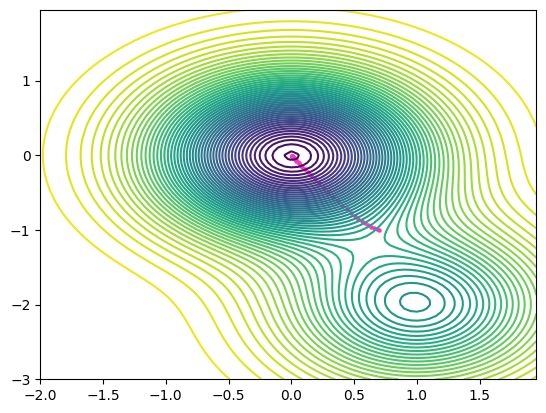

0.4965725960947896

In [33]:
smpl_gradient_func = SimpleGradientDescent(g_func, gradient)
smpl_gradient_func.minimize(0.7, -1, 50, if_verbose=True, if_plot=True)

Trace of search after 50 iterations (rounded to 4 decimal places): [[0.75, -1.25], [0.7455, -1.2603], [0.7418, -1.2709], [0.739, -1.2818], [0.737, -1.2931], [0.7358, -1.3049], [0.7354, -1.3172], [0.7358, -1.3301], [0.7369, -1.3436], [0.7388, -1.3578], [0.7414, -1.3726], [0.7447, -1.3881], [0.7487, -1.4043], [0.7533, -1.4212], [0.7586, -1.4388], [0.7644, -1.457], [0.7708, -1.4758], [0.7777, -1.4951], [0.785, -1.5149], [0.7927, -1.535], [0.8007, -1.5554], [0.8089, -1.5759], [0.8173, -1.5964], [0.8257, -1.6167], [0.8342, -1.6368], [0.8426, -1.6566], [0.851, -1.6759], [0.8591, -1.6947], [0.867, -1.7128], [0.8747, -1.7301], [0.8821, -1.7468], [0.8892, -1.7626], [0.8959, -1.7776], [0.9023, -1.7918], [0.9084, -1.8051], [0.914, -1.8177], [0.9194, -1.8294], [0.9244, -1.8403], [0.9291, -1.8505], [0.9334, -1.86], [0.9374, -1.8687], [0.9412, -1.8769], [0.9447, -1.8844], [0.9479, -1.8913], [0.9509, -1.8977], [0.9536, -1.9036], [0.9562, -1.9091], [0.9585, -1.9141], [0.9606, -1.9187], [0.9626, -1.922

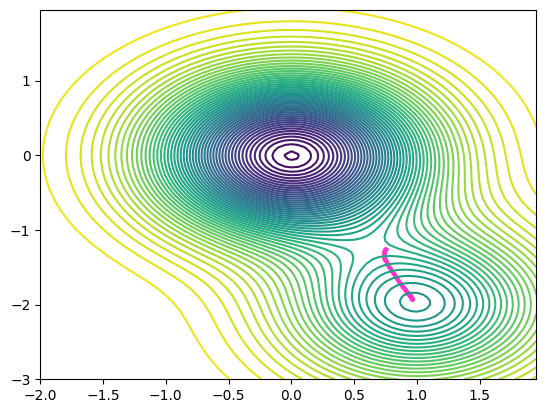

0.9936696306485948

In [34]:
smpl_gradient_func = SimpleGradientDescent(g_func, gradient)
smpl_gradient_func.minimize(0.75, -1.25, 50, if_verbose=True, if_plot=True)

# Wniosek po wizualizacji znajdowania minimum funkcji g(x)

### - **Metoda gradientu prostego** nie gwarantuje znalezienia najniższego punktu na całym obszarze dziedziny naszej funkcji. Metoda ta znajduje najniższy punkt w pewnym swoim otoczeniu (w przypadku funkcji f(x) nie mamy takiego problemu).

# Badanie wpływu współczynniku **alpha** (współczynnika długości kolejnych kroków)

## Testowanie na funkcji f(x)

### Problematyczny przypadek przy alpha = 1


W tym przypadku, z punktu (-1.4, -2) następuje przeskok do (1.4, 2) ale okazuje się to błędne (omineliśmy minimum), następnie jest zmiane alpha i następuje przeskok z (-1.4, -2) do punktu bardzo bliskiego (0, 0). Następnie alpha jest ciągle zmieniane, bo cały czas przeskok jest zbyt długi i powstaje bardzo długa pętla. Dlatego został zastosowany drugi warunek stopu opierający się na liczniku zmian współczynnika alpha.

Trace of search after 25 iterations (rounded to 4 decimal places): [[-1.4, -2.0], [-0.0, 0.0], [-0.0, 0.0]]
Min value of the function found is 1.5453606492465808e-45



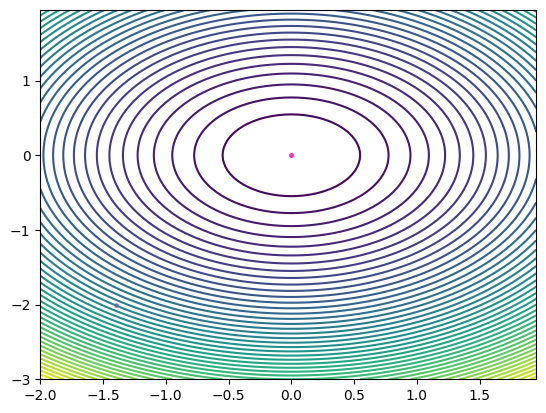

1.5453606492465808e-45

In [ ]:
smpl_gradient_func = SimpleGradientDescent(f_func, gradient, alpha=1)
smpl_gradient_func.minimize(-1.4, -2, 25, if_verbose=True, if_plot=True)

### Sprawdzenie zachowania dla alpha = 0.7

Punkty przeskakują z jednej strony na drugą i w końcu znajdowane jest minimum.

Trace of search after 25 iterations (rounded to 4 decimal places): [[-1.5, -2.9], [0.6, 1.16], [-0.24, -0.464], [0.096, 0.1856], [-0.0384, -0.0742], [0.0154, 0.0297], [-0.0061, -0.0119], [0.0025, 0.0048], [-0.001, -0.0019], [0.0004, 0.0008], [-0.0002, -0.0003], [0.0001, 0.0001], [-0.0, -0.0], [0.0, 0.0], [-0.0, -0.0], [0.0, 0.0], [-0.0, -0.0], [0.0, 0.0], [-0.0, -0.0], [0.0, 0.0], [-0.0, -0.0], [0.0, 0.0], [-0.0, -0.0], [0.0, 0.0], [-0.0, -0.0], [0.0, 0.0]]
Min value of the function found is 1.3513155403969122e-19



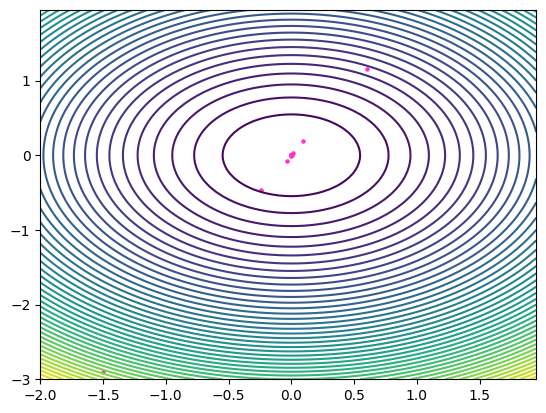

1.3513155403969122e-19

In [ ]:
smpl_gradient_func = SimpleGradientDescent(f_func, gradient, alpha=0.7)
smpl_gradient_func.minimize(-1.5, -2.9, 25, if_verbose=True, if_plot=True)

### Sprawdzenie dla alpha = 5

W przypadku ponieżej, alpha w trakcie znajdowania minimalnego punktu zostało zmniejszone do wartości 0.625 startując z 5

Trace of search after 25 iterations (rounded to 4 decimal places): [[-1.5, -2.9], [0.375, 0.725], [-0.0937, -0.1813], [0.0234, 0.0453], [-0.0059, -0.0113], [0.0015, 0.0028], [-0.0004, -0.0007], [0.0001, 0.0002], [-0.0, -0.0], [0.0, 0.0], [-0.0, -0.0], [0.0, 0.0], [-0.0, -0.0], [0.0, 0.0], [-0.0, -0.0], [0.0, 0.0], [-0.0, -0.0], [0.0, 0.0], [-0.0, -0.0], [0.0, 0.0], [-0.0, -0.0], [0.0, 0.0], [-0.0, -0.0]]
Min value of the function found is 3.4444317724391147e-26



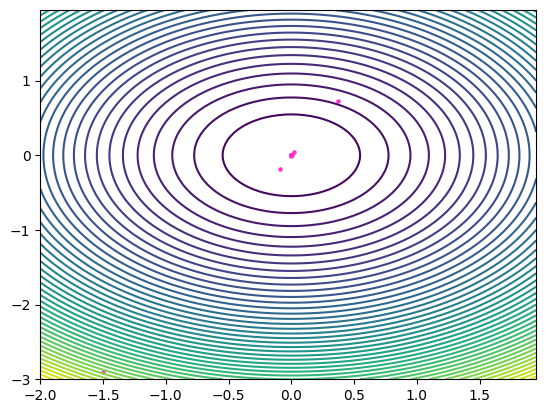

3.4444317724391147e-26

In [ ]:
smpl_gradient_func = SimpleGradientDescent(f_func, gradient, alpha=5)
smpl_gradient_func.minimize(-1.5, -2.9, 25, if_verbose=True, if_plot=True)

## Testowanie na funkcji g(x)

### Problematyczny przypadek, dla alpha 9.25 - *Niebezpieczeństwo dużego współczynnika alpha*


W tym przypadku, przez duży współczynnik alpha, znajdujać się w pobliżu minimum globalnego, znaleźliśmy minimum lokalne. Był to wynik dużego przeskoku (kroku), który został zrobiony na samym początku (w pierwszej iteracji).

Trace of search after 25 iterations (rounded to 4 decimal places): [[-1.0, 1.0], [1.5037, -1.5038], [0.7217, -2.1242], [1.0041, -1.9613], [0.9813, -1.9706], [0.9851, -1.9687], [0.9844, -1.9691], [0.9845, -1.969], [0.9845, -1.969], [0.9845, -1.969], [0.9845, -1.969], [0.9845, -1.969]]
Min value of the function found is 0.9927420920226762



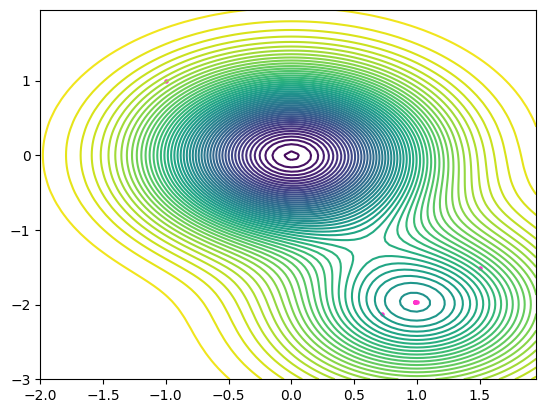

0.9927420920226762

In [ ]:
smpl_gradient_func = SimpleGradientDescent(g_func, gradient, alpha=9.25)
smpl_gradient_func.minimize(-1, 1, 25, if_verbose=True, if_plot=True)

### Sprawdzenie dla alpha = 5

Trace of search after 25 iterations (rounded to 4 decimal places): [[-1.0, 1.0], [0.3534, -0.3534], [-0.2995, 0.2448], [0.0238, -0.0204], [-0.0013, -0.0044], [0.0046, -0.0074], [0.0032, -0.0069], [0.0035, -0.007], [0.0035, -0.007], [0.0035, -0.007], [0.0035, -0.007], [0.0035, -0.007], [0.0035, -0.007], [0.0035, -0.007], [0.0035, -0.007], [0.0035, -0.007]]
Min value of the function found is 0.4965724836763416



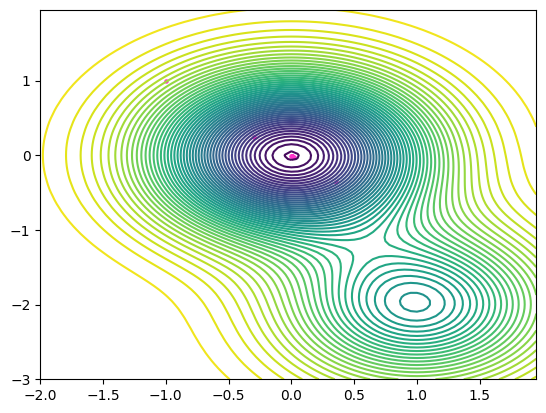

0.4965724836763416

In [ ]:
smpl_gradient_func = SimpleGradientDescent(g_func, gradient, alpha=5)
smpl_gradient_func.minimize(-1, 1, 25, if_verbose=True, if_plot=True)

### Sprawdzenie dla alpha = 0.1

Trace of search after 25 iterations (rounded to 4 decimal places): [[-1.0, 1.0], [-0.9729, 0.9729], [-0.9436, 0.9436], [-0.9118, 0.9118], [-0.8773, 0.8773], [-0.8396, 0.8396], [-0.7986, 0.7986], [-0.754, 0.754], [-0.7056, 0.7056], [-0.6535, 0.6535], [-0.5978, 0.5978], [-0.5393, 0.5393], [-0.479, 0.479], [-0.4184, 0.4184], [-0.3594, 0.3593], [-0.3038, 0.3037], [-0.2532, 0.253], [-0.2084, 0.2082], [-0.17, 0.1696], [-0.1376, 0.1371], [-0.1108, 0.1101], [-0.0888, 0.0879], [-0.0709, 0.0698], [-0.0564, 0.055], [-0.0447, 0.0431], [-0.0352, 0.0335]]
Min value of the function found is 0.49961832087826014



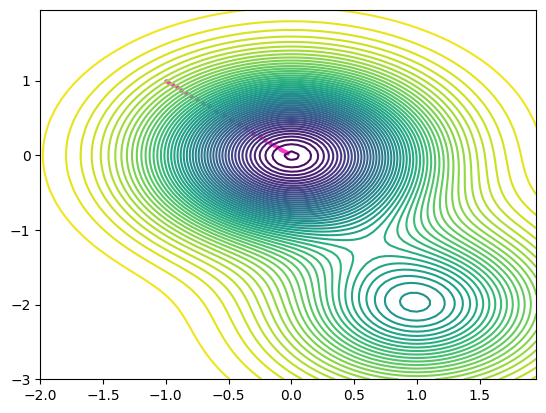

0.49961832087826014

In [ ]:
smpl_gradient_func = SimpleGradientDescent(g_func, gradient)
smpl_gradient_func.minimize(-1, 1, 25, if_verbose=True, if_plot=True)

# Wnioski po sprawdzeniu wpływu współczynnika alpha

### - wysokie alpha może powodować przeskoczenie minimalnej wartości funkcji
### - optymalna wartość alpha zapobiega przeskakiwaniu na drugą stronę minimum funkcji
### - raczej lepiej używać małych wartości współczynnika alpha typu 0.1
### - należy pamiętać że nawet bardzo małe alpha (przesuwanie małymi krokami) może prowadzić do znalezienie minimum lokalnego w otoczeniu naszego punktu startowego zamiast minimum globalnego